Annotaion experiment based on the npy files that created

In [16]:
# Import Libraries
import os
import pandas as pd

In [17]:
variables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']
# variables = ['EP_POV150','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [18]:
BASE_DIR = '/home/h6x/git_projects/ornl-svi-data-processing/processed_data/adjacency_pers_images_npy_county/experimet_8'
# BASE_DIR = '/home/h6x/git_projects/data_processing/processed_data/adjacency_pers_images_npy_county/experimet_3'
DATA_DIR = f"{BASE_DIR}/npy_all_variables"
COMBINED_FEATURES_DIR = f"{BASE_DIR}/npy_combined"

In [19]:
ANNOTATION_PATH = '/home/h6x/git_projects/ornl-svi-data-processing/processed_data/annotations/annotations_2018_90_2_classes.csv'

In [20]:
def get_npy_filenames(directory):
    """
    Get all .npy file names in the specified directory without the .npy extension.
    
    Args:
    directory (str): The path to the directory containing .npy files.
    
    Returns:
    list: A list of file names without the .npy extension.
    """
    file_names = []
    for file in os.listdir(directory):
        if file.endswith('.npy'):
            file_names.append(os.path.splitext(file)[0])
    return file_names

In [21]:
fips_codes = get_npy_filenames(COMBINED_FEATURES_DIR)

In [22]:
len(fips_codes)

2746

In [23]:
# full annotation df
annotation_df = pd.read_csv(ANNOTATION_PATH,dtype={'STCNTY':str})

In [24]:
# Filter the annotation dataframe to only include the FIPS codes that have been processed
annotation_df_filtered = annotation_df[annotation_df['STCNTY'].isin(fips_codes)]

In [25]:
annotation_df_filtered.shape

(2740, 4)

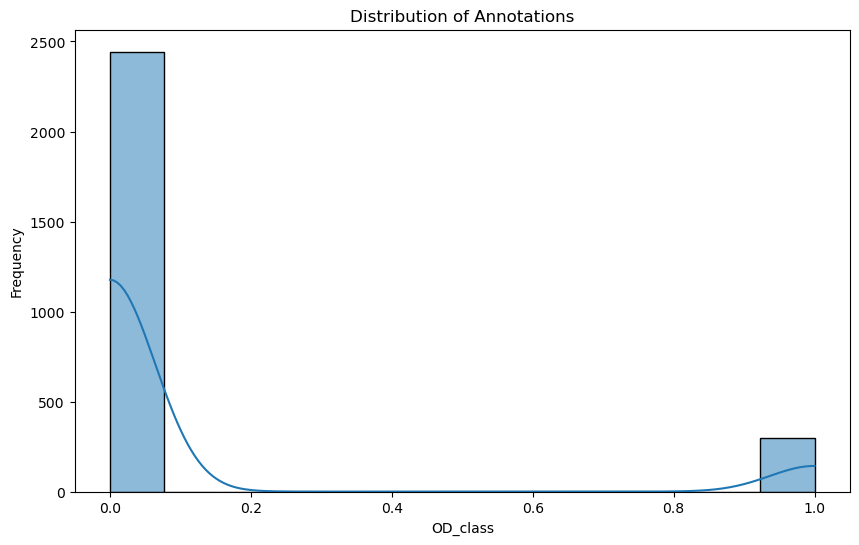

In [26]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(annotation_df_filtered['OD_class'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('OD_class')
plt.ylabel('Frequency')
plt.show()

In [27]:
# # get random 2000 samples from the annotation_df_filtered class 0 and all the samples from class 1

class_0 = annotation_df_filtered[annotation_df_filtered['OD_class'] == 0].sample(n=300, random_state=42)
class_1 = annotation_df_filtered[annotation_df_filtered['OD_class'] == 1]

# Combine the two classes
combined_df = pd.concat([class_0, class_1])

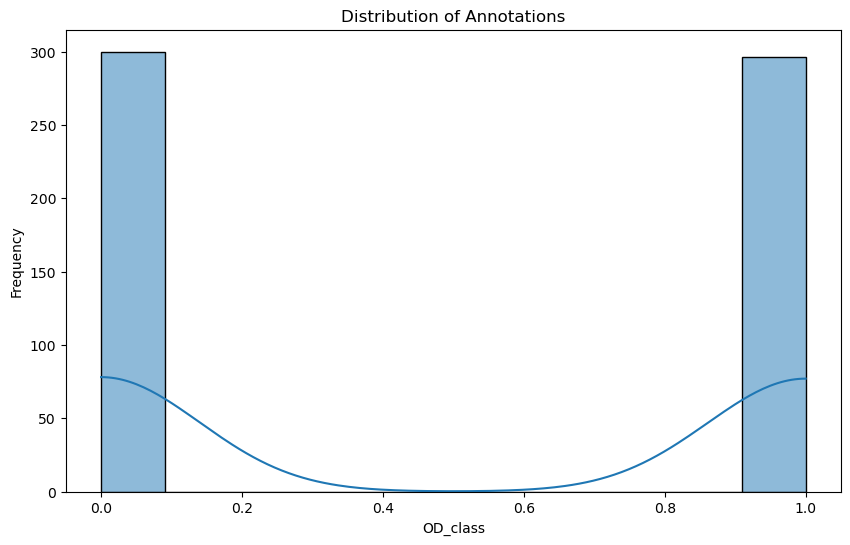

In [28]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['OD_class'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('OD_class')
plt.ylabel('Frequency')
plt.show()

In [29]:
# output annotation path
OUTPUT_ANNOTATION_PATH = f'{BASE_DIR}/annotations_2018_npy_2_classes_only_h0h1_90_percentile_all_data.csv'

In [30]:
# Save the filtered annotation dataframe
# combined_df.to_csv(OUTPUT_ANNOTATION_PATH, index=False)
annotation_df_filtered.to_csv(OUTPUT_ANNOTATION_PATH, index=False)